In [1]:
import os
import re
import string
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_and_preprocess(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    # Remove headers and footers
    text = re.split(r'---\n', text)[1]

    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    return tokens

In [3]:
folder_path = ""
file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.txt')]

In [4]:
all_filtered_tokens = []

# Get NLTK stopwords
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['shall','would','hand','r','written','h',"’",'hr','b']
stopwords.extend(newStopWords)

sia = SentimentIntensityAnalyzer()


results = []
for file_path in file_list:
    tokens = read_and_preprocess(file_path)
    filtered_tokens = [token for token in tokens if token.strip().lower() not in stopwords]
    text = ' '.join(filtered_tokens) # Join filtered tokens into a single string
    all_filtered_tokens.extend(filtered_tokens)
    
    # Print tokens for this letter
    file_name = os.path.basename(file_path)
    print(f"Tokens for letter {file_name}:")
    print(filtered_tokens)
    
    scores = sia.polarity_scores(text)
    letter_number = int(file_name.split('.')[0]) # Extract the letter number from the file name
    
    results.append({
        'letter_number': letter_number,
        'file': file_name,
        'compound': scores['compound'],
        'positive': scores['pos'],
        'negative': scores['neg'],
        'neutral': scores['neu']
    })
    
df = pd.DataFrame(results)
df = df.sort_values('letter_number')  # Sort the DataFrame by the letter number

Tokens for letter 1. Letter First.txt:
['turning', 'mind', 'contents', 'last', 'letters', 'put', 'great', 'agony', 'knowing', 'interpret', 'whether', 'disadvantage', 'show', 'places', 'advantage', 'understand', 'others', 'beseeching', 'earnestly', 'let', 'know', 'expressly', 'whole', 'mind', 'love', 'us', 'two', 'absolutely', 'necessary', 'obtain', 'answer', 'whole', 'year', 'stricken', 'dart', 'love', 'yet', 'sure', 'whether', 'fail', 'finding', 'place', 'heart', 'affection', 'last', 'point', 'prevented', 'time', 'past', 'calling', 'mistress', 'love', 'ordinary', 'love', 'name', 'suitable', 'denotes', 'singular', 'love', 'far', 'common', 'please', 'office', 'true', 'loyal', 'mistress', 'friend', 'give', 'body', 'heart', 'loyal', 'servant', 'rigour', 'forbid', 'promise', 'name', 'given', 'also', 'take', 'mistress', 'casting', 'others', 'besides', 'thoughts', 'affections', 'serve', 'beseech', 'give', 'entire', 'answer', 'rude', 'letter', 'may', 'know', 'far', 'may', 'depend', 'please', 

In [5]:
print(df)

    letter_number                       file  compound  positive  negative  \
0               1        1. Letter First.txt    0.9868     0.340     0.128   
10              2       2. Letter Second.txt    0.6997     0.258     0.073   
11              3        3. Letter Third.txt    0.9571     0.319     0.051   
12              4       4. Letter Fourth.txt    0.9890     0.403     0.114   
13              5        5. Letter Fifth.txt    0.9974     0.482     0.036   
14              6        6. Letter Sixth.txt    0.9917     0.395     0.097   
15              7      7. Letter Seventh.txt    0.9806     0.366     0.025   
16              8       8. Letter Eighth.txt    0.9972     0.458     0.091   
17              9        9. Letter Ninth.txt    0.9885     0.446     0.170   
1              10       10. Letter Tenth.txt   -0.8911     0.217     0.300   
2              11    11. Letter Eleventh.txt    0.9947     0.497     0.023   
3              12     12. Letter Twelfth.txt    0.9958     0.350

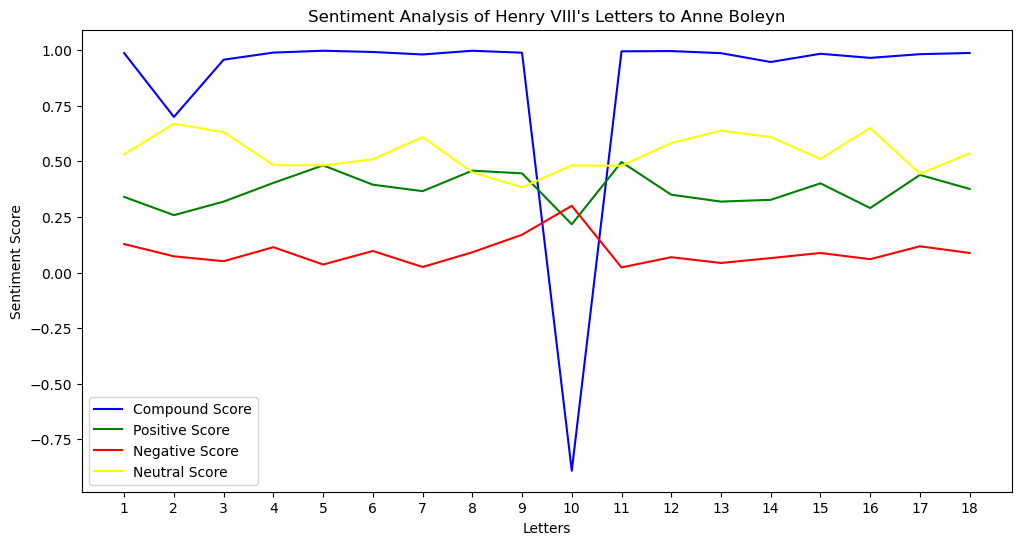

In [6]:
# Create a continuous range for the x-axis
x = range(len(df))

# Plot sentiment scores over time
plt.figure(figsize=(12, 6))
plt.plot(x, df['compound'], label='Compound Score',color='blue')
plt.plot(x, df['positive'], label='Positive Score',color='green')
plt.plot(x, df['negative'], label='Negative Score',color='red')
plt.plot(x, df['neutral'], label='Neutral Score',color='yellow')
plt.xticks(x, df['letter_number'])  # Set x-axis ticks to letter numbers
plt.xlabel('Letters')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Henry VIII\'s Letters to Anne Boleyn')
plt.legend()

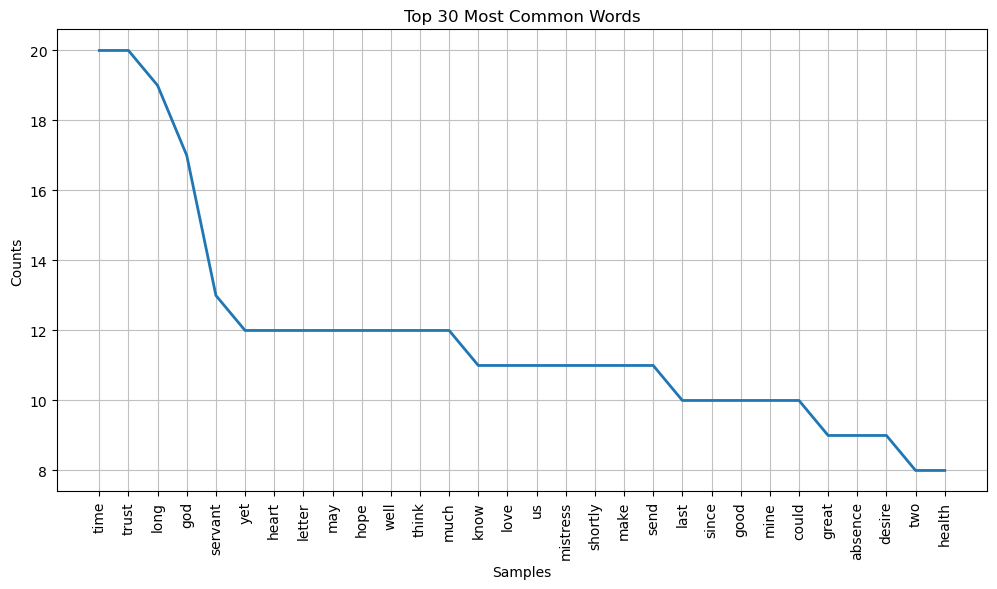

<Figure size 640x480 with 0 Axes>

In [7]:
# Frequency distribution of tokens
fdist = FreqDist(all_filtered_tokens)

# Plot the most common words
plt.figure(figsize=(12, 6))
fdist.plot(30, title='Top 30 Most Common Words')
plt.savefig('most_common_words.png', bbox_inches='tight')

Text(0.5, 1.0, "Word Cloud of Henry VIII's Letters to Anne Boleyn")

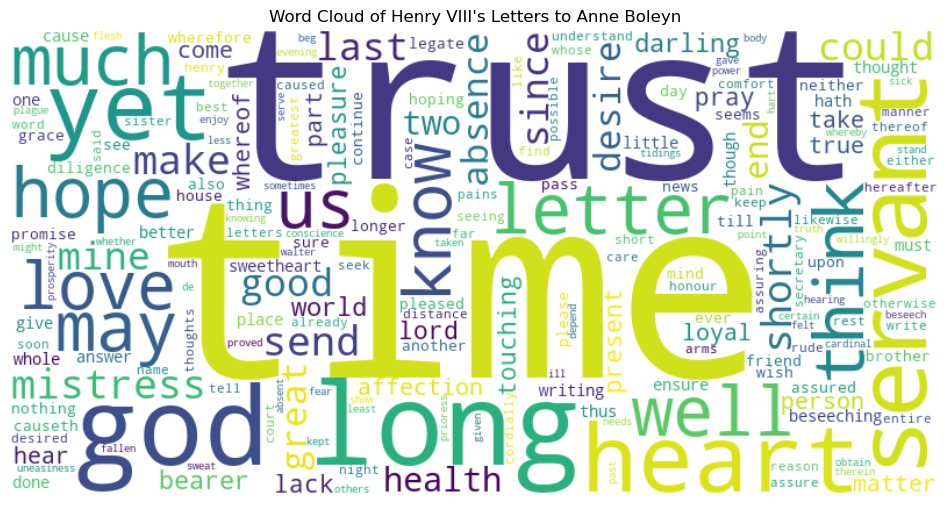

In [8]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Henry VIII\'s Letters to Anne Boleyn')